<a href="https://colab.research.google.com/github/Fernanda-Mesa/InteligenciaArtificial_MachineLearning/blob/main/clase13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Regresión Lineal**
La regresión lineal se utiliza para predecir un valor continuo. A continuación, se muestra un ejemplo de cómo implementarla en Python.



In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Ejercicio de la presentación** ¨Capitulo 5 unidad 3¨ en la pagina 214. Aquí se establecen los datos para mpg con diferentes puntos que permiten explicar el comportamiento de los resultados de mpg. Se alcaza a ver hasta la pagina 238.

El año puede sacarse dado que nos entrega una categoría, por lo que para los datos especificos en este ejercicio, puede delegarse. Esto se puede verificar con la linea 12, 13 y 14. Se eliminan.

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df.name.unique() #Nombre

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [5]:
df.model_year.unique() #Año

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [6]:
df.origin.unique() #Origen

array(['usa', 'japan', 'europe'], dtype=object)

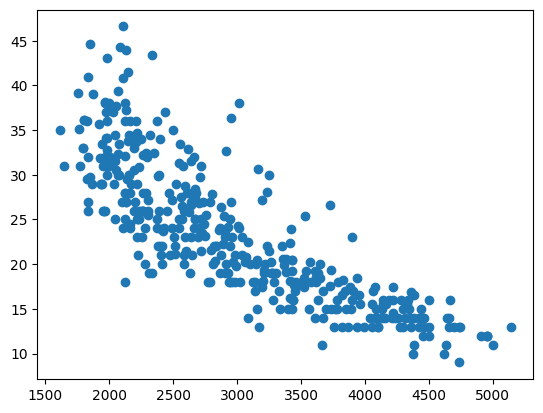

In [7]:
plt.scatter(df['weight'], df['mpg'])

In [8]:
#drop df categorical
df = df.drop(['name', 'model_year', 'origin'], axis=1)

In [9]:
df.describe() #Descripcion de los datos

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


Nos podemos fijar que hay una escala de diferencia muy alto. Lo cual puede generar un conflicto.

In [10]:
#split de datos
x = df.drop('mpg', axis=1)
y = df['mpg'] #mpg

#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

El split divide el set de entrenamiento en de testeo.

**Proximamente, trabajar con este dato.**

In [11]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

###**Para un nuevo ejemplo, instalaremos un link en la casilla, para poder abordar datos simples de regresión lineal.**

In [12]:
!wget https://raw.githubusercontent.com/davidlealo/sic_ai_2024/main/004_machine_learning/chapter_5/data_galton.csv
# Es de importancia que el archivo se encuentre en raw para ser importado correctamente.

--2024-08-09 07:03:49--  https://raw.githubusercontent.com/davidlealo/sic_ai_2024/main/004_machine_learning/chapter_5/data_galton.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10186 (9.9K) [text/plain]
Saving to: ‘data_galton.csv’

data_galton.csv     100%[===================>]   9.95K  --.-KB/s    in 0s      

2024-08-09 07:03:49 (39.3 MB/s) - ‘data_galton.csv’ saved [10186/10186]



In [13]:
df1 = pd.read_csv('data_galton.csv') #Leemos el archivo
df1

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


Obsrvemos la diferencia al aplicar el codigo **header**

In [14]:
df = pd.read_csv('data_galton.csv',header='infer') #Leemos el archivo
df

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   child   928 non-null    float64
 1   parent  928 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [16]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [17]:
# Hay mucho valores repetidos
# Por lo tanto, los resumimos como una tabla cruzada.
myTable = pd.crosstab(df.parent, df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


###**Problemas de la multicolinealidad en la regresión lineal:**

**Coeficientes de Regresión Inflados:** La presencia de multicolinealidad puede llevar a coeficientes de regresión que son extremadamente grandes o tienen signos contrarios a lo esperado. Esto se debe a que el modelo tiene dificultades para distinguir el efecto individual de cada variable independiente.

**Inestabilidad de los Coeficientes:** Los coeficientes de regresión pueden ser muy sensibles a pequeños cambios en los datos. Esto significa que una ligera modificación en los datos de entrenamiento puede...

**Inestabilidad de los Coeficientes:** Los coeficientes de regresión pueden ser muy sensibles a pequeños cambios en los datos. Esto significa que una ligera modificación en los datos de entrenamiento puede resultar en grandes cambios en los coeficientes estimados.

**Dificultad en la Interpretación:** Con alta multicolinealidad, es difícil determinar el efecto individual de cada variable independiente sobre la variable dependiente porque sus efectos están mezclados.

**Aumento de la Varianza de los Coeficientes:** La varianza de los coeficientes de las variables colineales se incrementa, lo que reduce la precisión de las estimaciones y puede llevar a intervalos de confianza más amplios.

**Impacto en las Predicciones:** Aunque la multicolinealidad no afecta la capacidad predictiva del modelo de manera directa, sí puede hacer que las predicciones sean menos fiables y más sensibles a cambios en los datos.

In [18]:
# Transforme la tabla cruzada para que pueda visualizarse com oun diagrama de dispersión.
myTable.style.background_gradient(cmap='coolwarm') # Color Gradient

child,61.700000,62.200000,63.200000,64.200000,65.200000,66.200000,67.200000,68.200000,69.200000,70.200000,71.200000,72.200000,73.200000,73.700000
parent,,,,,,,,,,,,,,
64.000000,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.500000,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.500000,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.500000,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.500000,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.500000,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.500000,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.500000,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.500000,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [19]:
# Transforme la tabla cruzada para que pueda visualizarse com oun diagrama de dispersión.
# Tamaño del punto = Frecuencia.
nrows = myTable.shape[0]
print(nrows)

11


In [20]:
ncols = myTable.shape[1]
print(ncols)

14


In [21]:
childHeights = list(myTable.columns)
print(childHeights)

[61.7, 62.2, 63.2, 64.2, 65.2, 66.2, 67.2, 68.2, 69.2, 70.2, 71.2, 72.2, 73.2, 73.7]


In [22]:
parentHeights = list(myTable.index)
print(parentHeights)

[64.0, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.0]


In [23]:
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights ]
print(combo)

[(64.0, 61.7, 1), (64.0, 62.2, 0), (64.0, 63.2, 2), (64.0, 64.2, 4), (64.0, 65.2, 1), (64.0, 66.2, 2), (64.0, 67.2, 2), (64.0, 68.2, 1), (64.0, 69.2, 1), (64.0, 70.2, 0), (64.0, 71.2, 0), (64.0, 72.2, 0), (64.0, 73.2, 0), (64.0, 73.7, 0), (64.5, 61.7, 1), (64.5, 62.2, 1), (64.5, 63.2, 4), (64.5, 64.2, 4), (64.5, 65.2, 1), (64.5, 66.2, 5), (64.5, 67.2, 5), (64.5, 68.2, 0), (64.5, 69.2, 2), (64.5, 70.2, 0), (64.5, 71.2, 0), (64.5, 72.2, 0), (64.5, 73.2, 0), (64.5, 73.7, 0), (65.5, 61.7, 1), (65.5, 62.2, 0), (65.5, 63.2, 9), (65.5, 64.2, 5), (65.5, 65.2, 7), (65.5, 66.2, 11), (65.5, 67.2, 11), (65.5, 68.2, 7), (65.5, 69.2, 7), (65.5, 70.2, 5), (65.5, 71.2, 2), (65.5, 72.2, 1), (65.5, 73.2, 0), (65.5, 73.7, 0), (66.5, 61.7, 0), (66.5, 62.2, 3), (66.5, 63.2, 3), (66.5, 64.2, 5), (66.5, 65.2, 2), (66.5, 66.2, 17), (66.5, 67.2, 17), (66.5, 68.2, 14), (66.5, 69.2, 13), (66.5, 70.2, 4), (66.5, 71.2, 0), (66.5, 72.2, 0), (66.5, 73.2, 0), (66.5, 73.7, 0), (67.5, 61.7, 0), (67.5, 62.2, 3), (67.5, 

In [24]:
combo = pd.DataFrame(combo, columns=['x', 'y', 'freq'])
print(combo)

        x     y  freq
0    64.0  61.7     1
1    64.0  62.2     0
2    64.0  63.2     2
3    64.0  64.2     4
4    64.0  65.2     1
..    ...   ...   ...
149  73.0  70.2     0
150  73.0  71.2     0
151  73.0  72.2     1
152  73.0  73.2     3
153  73.0  73.7     0

[154 rows x 3 columns]


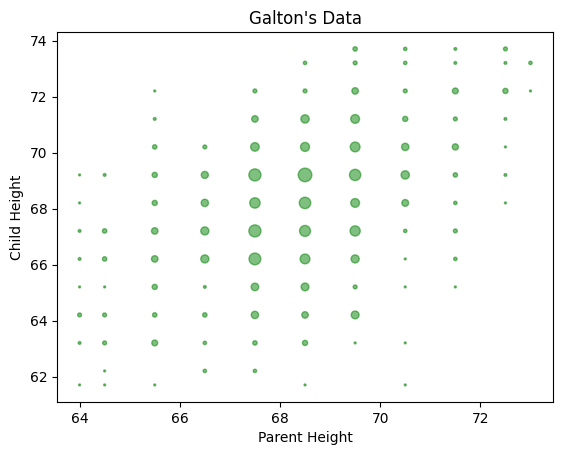

In [25]:
#Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green', alpha=0.5)
plt.xlabel('Parent Height')
plt.ylabel('Child Height')
plt.title("Galton's Data")
plt.show()


In [26]:
# Instanciar un objeto de regresión Lineal. Este sirve para....por los hiper parametros.
lm = LinearRegression()

In [27]:
# Train.
lm.fit(df[['parent']], df['child'])

LinearRegression()

In [28]:
# Show the intercept.
lm.intercept_

23.941530180412975

In [29]:
# Show the slope (pendiente).
lm.coef_

array([0.64629058])

In [30]:
#Visualización de la regresión lineal.
# Predicted Y.
y_pred = lm.predict(df[['parent']])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

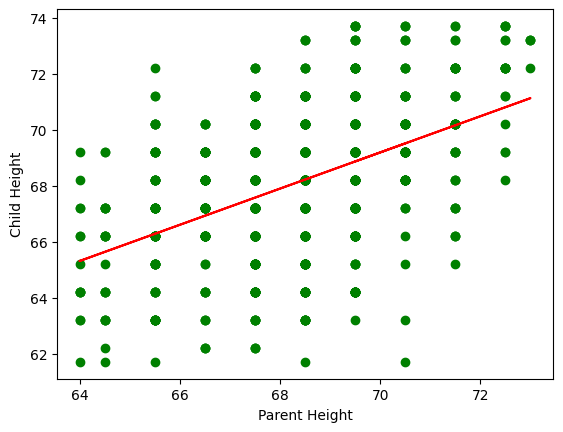

In [31]:
# Show the Scatter plot + Regression line.
plt.scatter(df.parent, df.child, c='green')
plt.plot(df.parent, y_pred, c='red')
plt.xlabel('Parent Height')
plt.ylabel('Child Height')
plt
# Acá pierdo información dado que no me marca la frecuencia.

<function matplotlib.pyplot.show(close=None, block=None)>

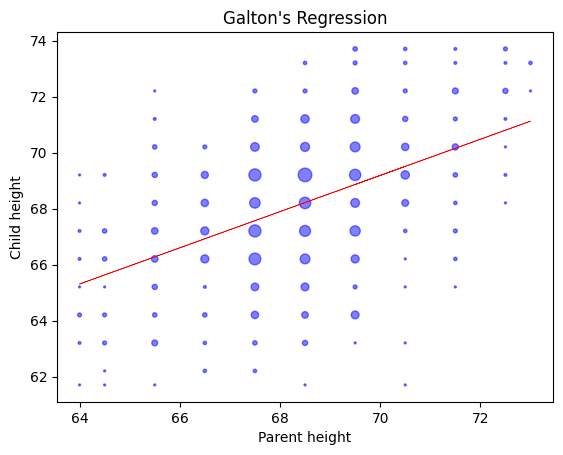

In [32]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values, y_pred,c = 'red', linestyle='-',linewidth=0.5)
plt.scatter (combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show
# A los lados se ve más delgado dado que la frecuencia es menor.